## Solução do problema térmico 1-D

- Método das diferenças finitas

__Imports:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Problema:__ (Permanente) 

!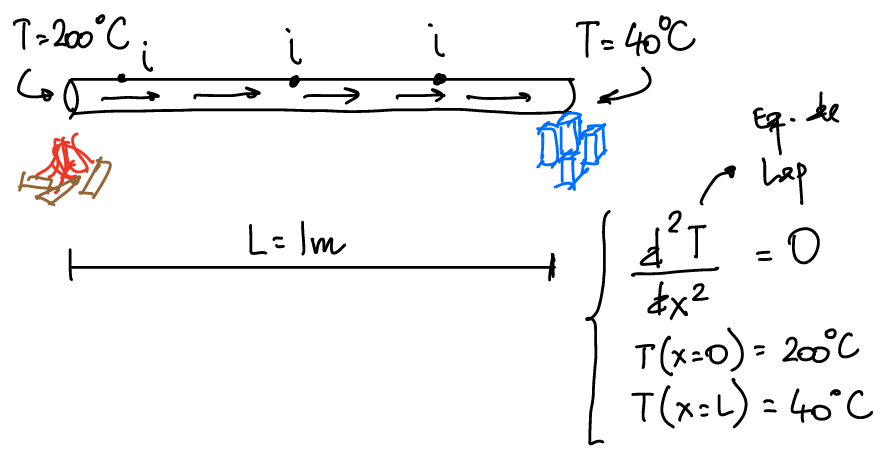

Solução analítica:

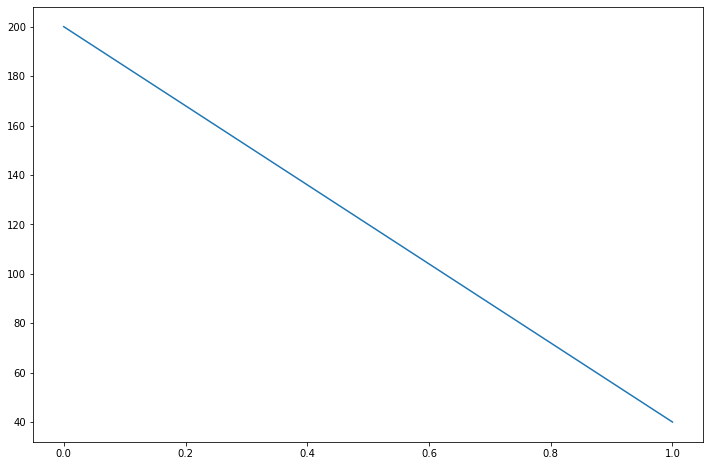

In [2]:
Lx=1
def T(x):
    c2=200
    c1=(40-c2)/Lx
    return c1*x+c2

plt.figure(figsize=(12,8))
x_sa = np.linspace(0, Lx)
plt.plot(x_sa,T(x_sa))
plt.show()

Solução numérica: Método das diferenças finitas

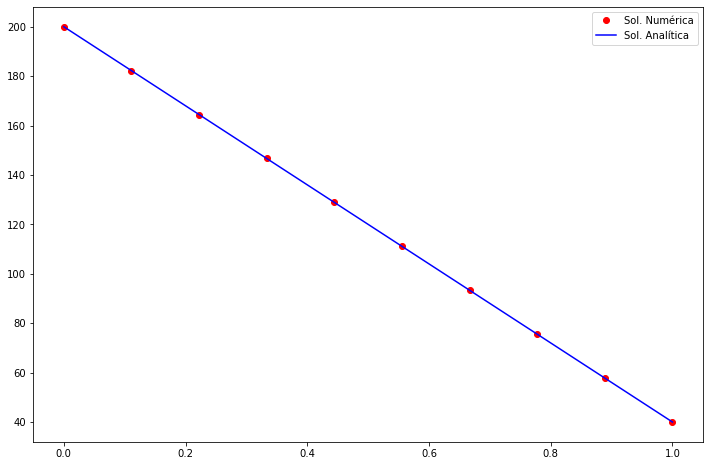

In [3]:
npoints = 10
x = np.linspace(0,Lx,npoints)
A = np.zeros((npoints,npoints), dtype='float')
b = np.zeros((npoints), dtype='float')

#C.C
Te = 200; Tf = 40
A[0,0] = 1; A[-1,-1] = 1
b[0] = Te; b[-1] = Tf

# Pontos internos
alpha = 1.0; Deltax = Lx/(npoints-1); rho = 1.0; Cv = 1.0; Q = 0.0

for i in range(1,npoints-1):
    A[i,i] = -2*alpha/Deltax**2
    A[i,i-1] = alpha/Deltax**2
    A[i,i+1] = alpha/Deltax**2
    b[i] = -Q/rho*Cv

T_num = np.linalg.solve(A,b)

plt.figure(figsize=(12,8))
plt.plot(x,T_num,'or')
plt.plot(x_sa,T(x_sa),'b')
plt.legend(['Sol. Numérica','Sol. Analítica'])
plt.show()

__Problema:__ (Com geração, permanente) 

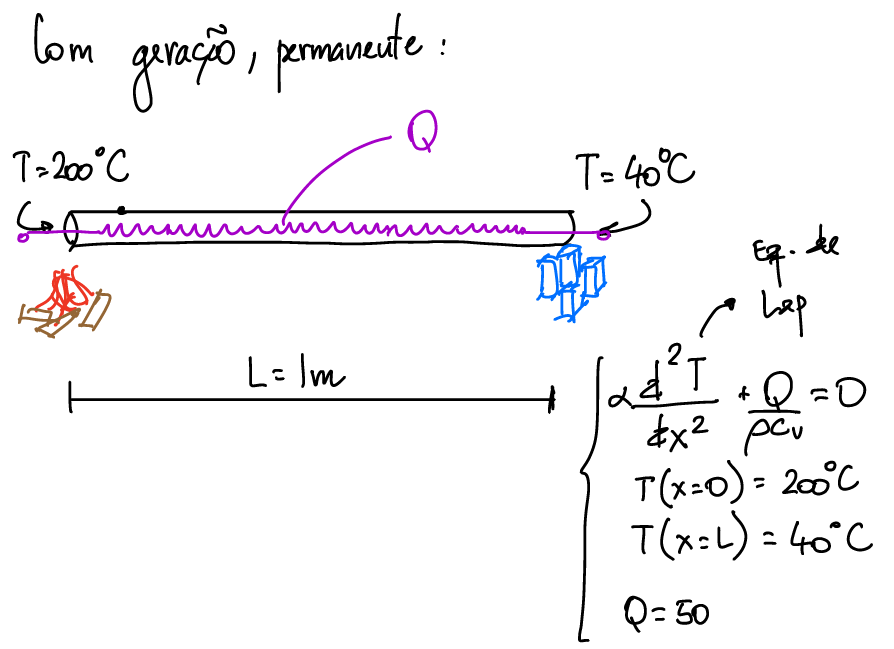

Solução analítica:

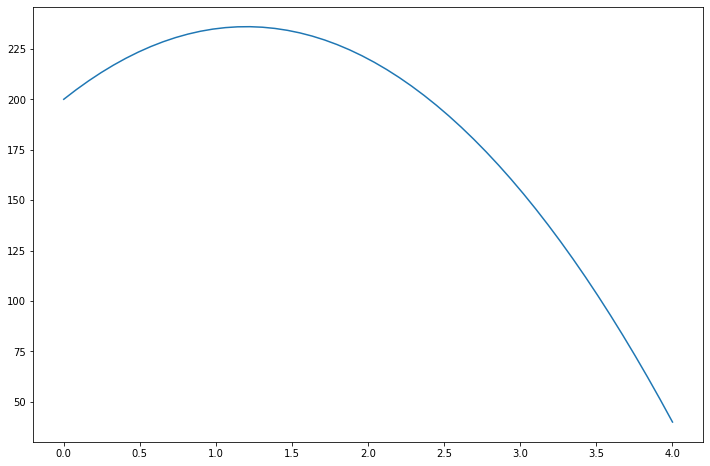

In [4]:
alpha = 1.0; rho = 1.0; Cv = 1.0; Q = 50; Lx=4
def T(x):
    c1=-Q/(2*rho*Cv*alpha)
    c3=200
    c2=-c1*Lx - 160/Lx
    return c1*x**2+c2*x+c3

x_sa = np.linspace(0, Lx)
plt.figure(figsize=(12,8))
plt.plot(x_sa,T(x_sa))
plt.show()

Solução numérica: Método das diferenças finitas

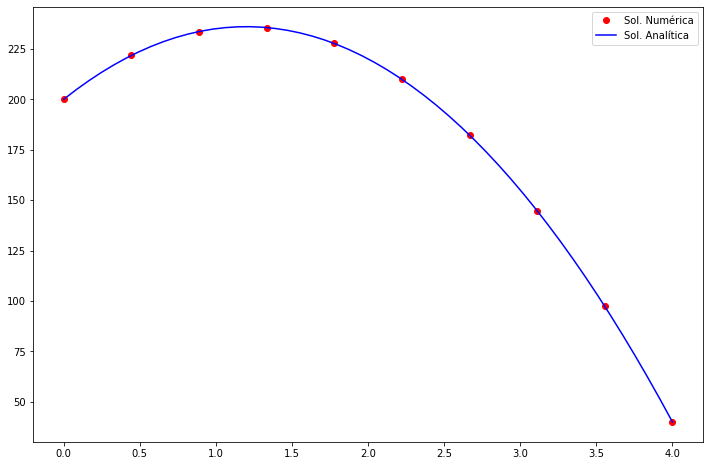

In [5]:
npoints = 10
x = np.linspace(0,Lx,npoints)
A = np.zeros((npoints,npoints), dtype='float')
b = np.zeros((npoints), dtype='float')

#C.C
Te = 200; Tf = 40
A[0,0] = 1; A[-1,-1] = 1
b[0] = Te; b[-1] = Tf

Deltax = Lx/(npoints-1)
# Pontos internos
for i in range(1,npoints-1):
    A[i,i] = -2*alpha/(Deltax**2)
    A[i,i-1] = alpha/(Deltax**2)
    A[i,i+1] = alpha/(Deltax**2)
    b[i] = -Q/(rho*Cv)

#Ainv = np.linalg.inv(A)
#T_num = Ainv@b
T_num = np.linalg.solve(A,b)

plt.figure(figsize=(12,8))
plt.plot(x,T_num,'or')
plt.plot(x_sa,T(x_sa),'b')
plt.legend(['Sol. Numérica','Sol. Analítica'])
plt.show()

__Problema:__ (Transiente) 

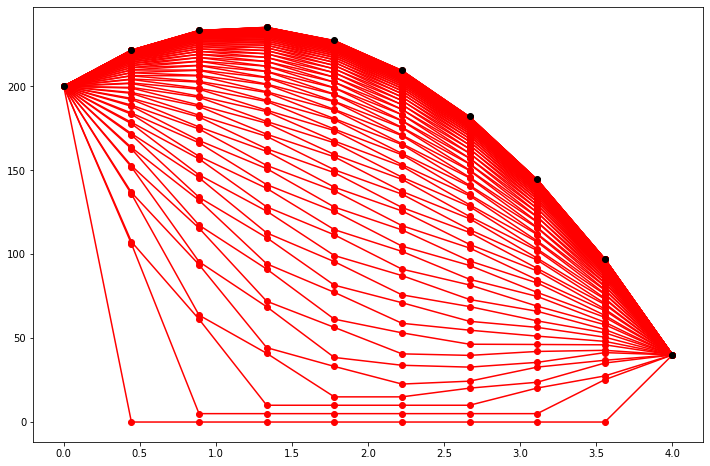

In [7]:
npoints = 10
x = np.linspace(0,Lx,npoints)
A = np.zeros((npoints,npoints), dtype='float')
b = np.zeros((npoints), dtype='float')
T = np.zeros((npoints), dtype='float')

#C.C
Te = 200; Tf = 40
A[0,0] = 1.0; A[-1,-1] = 1.0
b[0] = Te; b[-1] = Tf

Deltax = Lx/(npoints-1)
Deltat = 0.1
for i in range(1,npoints-1):
    A[i,i] = 1.0

#C.I
T[0] = Te; T[-1] = Tf
plt.figure(figsize=(12,8))
plt.plot(x,T,'ro-')

# Pontos internos
for n in range(0,100):
    for i in range(1,npoints-1):
        b[i] = T[i] \
               + (Deltat*alpha/(Deltax**2))*(T[i-1]-2*T[i]+T[i+1]) \
               + Deltat*Q/(rho*Cv)

    T = np.linalg.solve(A,b)
    plt.plot(x,T,'ro-')

plt.plot(x,T_num,'ok')
plt.show()